# Tratamento dos dados 
## da pandemia de COVID-19
### no Rio de Janeiro

In [1]:
using CSV
using DataFrames
using Dates
using Plots
using Distributions
using Random

## 1; Carregando e filtrando os dados

In [2]:
df = DataFrame(CSV.File("Dados_CEP_MRJ_covid_19.csv"))

,dt_notific,dt_inicio_sintomas,bairro_resid__estadia,ap_residencia_estadia,evolucao
,String15?,String15,String31,Float64,String15?
1,06/11/2020,05/28/2020,COSMOS,5.2,óbito
2,12/19/2020,12/18/2020,TIJUCA,2.2,recuperado
3,12/14/2020,12/14/2020,TIJUCA,2.2,óbito
4,11/30/2020,11/23/2020,ROCHA MIRANDA,3.3,recuperado
5,12/10/2020,12/01/2020,BENTO RIBEIRO,3.3,recuperado
6,12/18/2020,12/15/2020,CAMPO GRANDE,5.2,recuperado
7,12/16/2020,12/12/2020,COSMOS,5.2,recuperado
8,12/13/2020,12/10/2020,TIJUCA,2.2,recuperado
9,12/18/2020,12/11/2020,TAQUARA,4.0,óbito


### 1.1; Tamanho

In [3]:
println("Tamanho: $(round(Base.summarysize(df)/1024/1024, digits=2)) Mb")

Tamanho: 17.22 Mb


### 1.2; Campos

In [4]:
names(df)

8-element Vector{String}:
 "dt_notific"
 "dt_inicio_sintomas"
 "bairro_resid__estadia"
 "ap_residencia_estadia"
 "evolucao"
 "dt_evolucao"
 "cep"
 "data_atualizacao"

In [5]:
Set(df[:, "data_atualizacao"])

Set{String15} with 2 elements:
  "11/08/2021"
  "08/11/2021"

In [6]:
df[1,"data_atualizacao"]

"08/11/2021"

In [7]:
DataFinal = Date(df[1, "data_atualizacao"], "d/m/y")

2021-11-08

### 1.3; Atualizando apenas com campos de interesse

In [8]:
df = select(df, "dt_inicio_sintomas", "evolucao", "dt_evolucao")

,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,05/28/2020,óbito,12/31/2020
2,12/18/2020,recuperado,12/31/2020
3,12/14/2020,óbito,12/31/2020
4,11/23/2020,recuperado,12/31/2020
5,12/01/2020,recuperado,12/31/2020
6,12/15/2020,recuperado,12/31/2020
7,12/12/2020,recuperado,12/31/2020
8,12/10/2020,recuperado,12/31/2020
9,12/11/2020,óbito,12/31/2020


In [9]:
println("Tamanho: $(round(Base.summarysize(df)/1024/1024, digits=2)) Mb")

Tamanho: 5.25 Mb


## 2; Exploração dos dados

### 2.1; Formato das datas

In [10]:
NUM = 0

for row in eachrow(df)
    if row[1] !== missing
        if parse(Int8,row[1][1:2]) > 12
            NUM += 1
        end
    end
    if row[3] !== missing
        if parse(Int8,row[3][1:2]) > 12
            NUM += 1
        end
    end
end

println(NUM)

0


- Ao que tudo indica, todas as datas pertinentes estão no formato `mm/dd/yyyy`, a despeito do formato da entrada `dt_atualizacao`, que pode variar.

### 2.2; Data Inicial

In [11]:
DataInicial = minimum(Date.(df[:,"dt_inicio_sintomas"],"m/d/y"))

1945-03-23

In [12]:
df[df[:,"dt_inicio_sintomas"] .=== String15("03/23/1945"),:]

,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,03/23/1945,Recuperado,missing


In [13]:
df[(Date.(df[:,"dt_inicio_sintomas"],"m/d/y") .< Date.("01/01/2020","m/d/y")),:]

,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,10/11/2012,Recuperado,missing
2,03/23/2005,Recuperado,missing
3,05/24/2007,Recuperado,missing
4,03/23/1945,Recuperado,missing
5,10/10/2018,Recuperado,missing
6,01/28/2008,Recuperado,missing
7,04/17/2006,Recuperado,missing


In [14]:
df = df[(Date.(df[:,"dt_inicio_sintomas"],"m/d/y") .>= Date.("01/01/2020","m/d/y")),:]

DataInicial = minimum(Date.(df[:,"dt_inicio_sintomas"],"m/d/y"))

@show DataInicial

df[(Date.(df[:,"dt_inicio_sintomas"],"m/d/y") .< Date.("02/01/2020","m/d/y")),:]

DataInicial = Date("2020-01-01")


,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,01/20/2020,óbito,02/14/2021
2,01/28/2020,recuperado,02/10/2020
3,01/29/2020,Recuperado,missing
4,01/01/2020,Recuperado,missing
5,01/18/2020,Recuperado,missing
6,01/01/2020,Recuperado,missing
7,01/06/2020,Recuperado,missing
8,01/05/2020,Recuperado,missing
9,01/15/2020,Recuperado,missing


### 2.3; Tipos de evolução

In [15]:
Set(df[:,"evolucao"])

Set{Union{Missing, String15}} with 6 elements:
  "recuperado"
  "Recuperado"
  "Ativo"
  missing
  "ativo"
  "óbito"

In [16]:
df[df[:,"evolucao"].===String15("recuperado"),"evolucao"] .= "RECUPERADO"
df[df[:,"evolucao"].===String15("Recuperado"),"evolucao"] .= "RECUPERADO"
df[df[:,"evolucao"].===String15("Ativo"),"evolucao"] .= "ATIVO"
df[df[:,"evolucao"].===String15("ativo"),"evolucao"] .= "ATIVO"
df[df[:,"evolucao"].===String15("óbito"),"evolucao"] .= "OBITO"

Set(df[:,"evolucao"])

Set{Union{Missing, String15}} with 4 elements:
  "RECUPERADO"
  missing
  "OBITO"
  "ATIVO"

In [17]:
@show sum(df[:,"evolucao"] .=== missing)
df[df[:,"evolucao"] .=== missing,:]

sum(df[:, "evolucao"] .=== missing) = 62


,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,12/02/2020,missing,12/28/2020
2,11/07/2020,missing,12/09/2020
3,08/02/2020,missing,12/01/2020
4,05/25/2020,missing,11/13/2020
5,10/19/2020,missing,10/19/2020
6,09/15/2020,missing,10/13/2020
7,10/02/2020,missing,10/08/2020
8,09/18/2020,missing,10/06/2020
9,08/10/2020,missing,10/03/2021


- O que são esses dados? 


- Como são muito poucos ($62\ll 442035$) e suficientemente espalhados, **optaremos por descartá-los**.

In [18]:
df = df[df[:,"evolucao"] .!== missing, :]
Set(df[:,"evolucao"])

Set{Union{Missing, String15}} with 3 elements:
  "RECUPERADO"
  "OBITO"
  "ATIVO"

### 2.4; Falsos casos ativos

In [19]:
Set(df[(df[:,"evolucao"].===String15("ATIVO")),"dt_evolucao"])

Set{Union{Missing, String15}} with 1 element:
  missing

- Observe que todos os casos ativos não possuem registro de data de evolução do quadro, o que faz sentido. 


- Apesar disso, estes casos possuem registros de início de sintomas espalhados durante todo período da pandemia:

In [20]:
Set(df[(df[:,"evolucao"].===String15("ATIVO")),"dt_inicio_sintomas"])

Set{String15} with 608 elements:
  "03/13/2020"
  "04/10/2021"
  "08/08/2020"
  "10/01/2020"
  "03/07/2021"
  "01/20/2021"
  "03/23/2020"
  "12/12/2020"
  "04/26/2021"
  "01/30/2021"
  "05/20/2021"
  "04/14/2021"
  "07/17/2020"
  "12/25/2020"
  "11/17/2020"
  "05/25/2020"
  "01/11/2021"
  "12/08/2020"
  "08/16/2021"
  "04/29/2021"
  "05/10/2021"
  "12/18/2020"
  "05/29/2021"
  "05/29/2020"
  "10/08/2021"
  ⋮ 

In [21]:
NumDiasInicioAoFim = DataFinal - DataInicial + Day(1)

NumDiasInicioAoFimValor = NumDiasInicioAoFim.value

Datas = DataInicial .+ Day.(0:NumDiasInicioAoFimValor-1)

CasosAtivosEmCadaData = fill(0,NumDiasInicioAoFimValor)

for data in Datas
    IndiceData = (data - DataInicial + Day(1)).value
    CasosAtivosEmCadaData[IndiceData] = sum((df[:,"evolucao"].===String15("ATIVO")) .& (df[:,"dt_inicio_sintomas"].===String15(Dates.format(data,"mm/dd/yyyy"))))
end

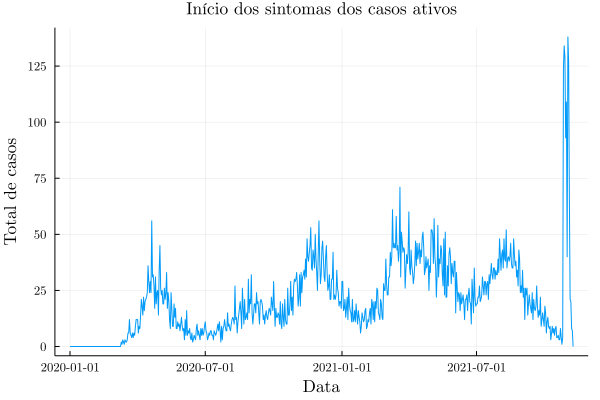

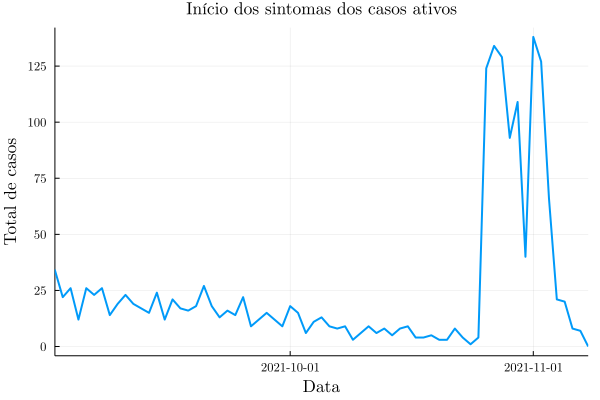

In [22]:
pl = plot(Datas, CasosAtivosEmCadaData, label="")
plot!(pl, title = "Início dos sintomas dos casos ativos", titlefontsize = 11, xlabel = "Data", ylabel = 
    "Total de casos", fontfamily = "Computer Modern")
display(pl)
savefig(pl, "active_cases1.pdf")

pl = plot(Datas, CasosAtivosEmCadaData, label = "", lw = 2)
plot!(pl, title = "Início dos sintomas dos casos ativos", titlefontsize = 11, xlabel = "Data", ylabel =
    "Total de casos", fontfamily = "Computer Modern", xlim =
    (Date("09/01/2021", "m/d/y"), Date("11/08/2021", "m/d/y")))
display(pl)
savefig(pl, "active_cases2.pdf")

- Supondo que estes indivíduos permaneceram infectados destas datas até a data de atualização da planilha, teríamos a existência de muitos indivíduos infectados por mais do que um ano, o que seria muito estranho.


- Desta forma, **podemos considerar que os indíviduos "ativos" mais antigos são na verdade indivíduos recuperados** cuja evolução do quadro não foi devidamente registrada.


- Perceba que existe uma explosão nos casos ativos no final do período considerado. **Estes serão considerados verdadeiros ativos**.

In [23]:
CasosAtivosEmCadaData[(Date("10/25/2021","m/d/y") - DataInicial + Day(1)).value]

4

In [24]:
CasosAtivosEmCadaData[(Date("10/26/2021","m/d/y") - DataInicial + Day(1)).value]

124

In [25]:
df[(df[:,"evolucao"].===String15("ATIVO")) .&
    (Date.(df[:,"dt_inicio_sintomas"],"m/d/y").<Date("10/26/2021","m/d/y")),"evolucao"] .= "RECUPERADO"

nothing

### 2.5; Datas de evolução não registradas

In [26]:
sum(df[:,"dt_evolucao"] .=== missing)

383432

In [27]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("RECUPERADO")))

382403

In [28]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("ATIVO")))

1016

In [29]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("OBITO")))

13

In [30]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("RECUPERADO")))/
sum(df[:,"evolucao"] .=== String15("RECUPERADO"))

0.9278698468929707

In [31]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("ATIVO")))/
sum(df[:,"evolucao"] .=== String15("ATIVO"))

1.0

In [32]:
sum((df[:,"dt_evolucao"] .=== missing) .& (df[:,"evolucao"] .=== String15("OBITO")))/
sum(df[:,"evolucao"] .=== String15("OBITO"))

0.0004510756419153366

## 3; Modelagem dos dados de dias de infecção


- Modelando os dados de dias infecção por COVID-19 podemos completar os dados faltantes.

In [33]:
dfRecuperadosDatasCompletas = df[(df[:,"evolucao"].===String15("RECUPERADO")) .& (df[:,"dt_evolucao"].!==missing),:]

,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,12/18/2020,RECUPERADO,12/31/2020
2,11/23/2020,RECUPERADO,12/31/2020
3,12/01/2020,RECUPERADO,12/31/2020
4,12/15/2020,RECUPERADO,12/31/2020
5,12/12/2020,RECUPERADO,12/31/2020
6,12/10/2020,RECUPERADO,12/31/2020
7,12/04/2020,RECUPERADO,12/31/2020
8,12/12/2020,RECUPERADO,12/31/2020
9,11/29/2020,RECUPERADO,12/31/2020


In [34]:
Set(Date.(dfRecuperadosDatasCompletas[:,3],"m/d/y"))

Set{Date} with 600 elements:
  Date("2021-10-13")
  Date("2020-05-13")
  Date("2020-05-10")
  Date("2020-07-21")
  Date("2020-07-07")
  Date("2021-09-15")
  Date("2021-05-26")
  Date("2020-03-22")
  Date("2020-09-11")
  Date("2020-12-10")
  Date("2021-09-12")
  Date("2021-03-24")
  Date("2021-10-15")
  Date("2021-05-13")
  Date("2020-07-31")
  Date("2021-04-10")
  Date("2021-01-10")
  Date("2020-07-12")
  Date("2021-08-20")
  Date("2021-07-05")
  Date("2021-06-28")
  Date("2020-04-21")
  Date("2020-04-19")
  Date("2021-11-03")
  Date("2021-04-21")
  ⋮ 

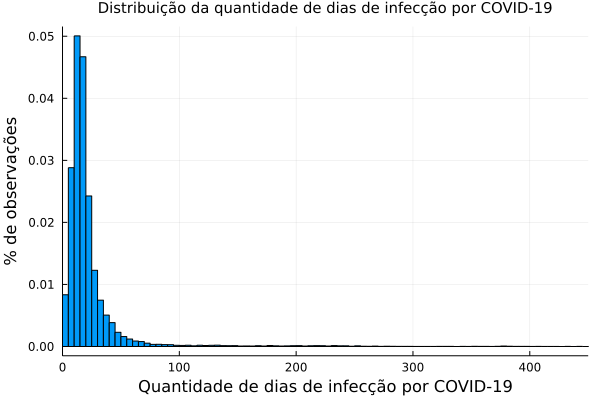

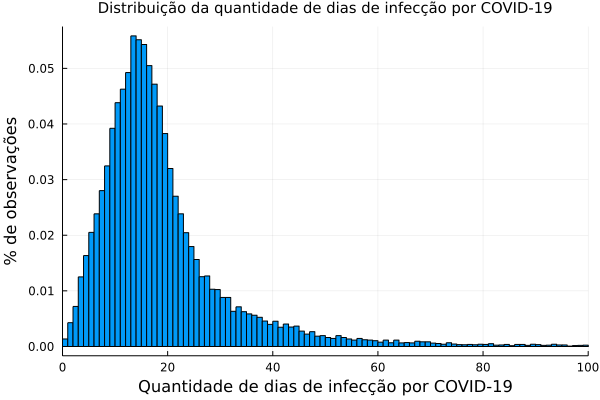

In [35]:
QtdDiasRecuperadosCompletos = Date.(dfRecuperadosDatasCompletas[:,3],"m/d/y") .- Date.(dfRecuperadosDatasCompletas[:,1],"m/d/y")
QtdDiasRecuperadosCompletosValores = [qd.value for qd in QtdDiasRecuperadosCompletos]

pl = histogram(QtdDiasRecuperadosCompletosValores,bins=200,normalize=true,label="",xlims=(0,450))
plot!(pl, title="Distribuição da quantidade de dias de infecção por COVID-19", titlefontsize=10,
    xlabel="Quantidade de dias de infecção por COVID-19",ylabel="% de observações")
display(pl)

histogram(QtdDiasRecuperadosCompletosValores,normalize=true,label="",xlims=(0,100))
plot!(title="Distribuição da quantidade de dias de infecção por COVID-19", titlefontsize=10,
    xlabel="Quantidade de dias de infecção por COVID-19",ylabel="% de observações")

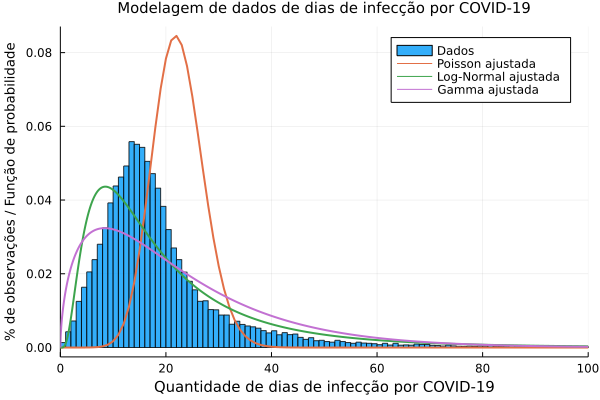

mean(QtdDiasRecuperadosCompletosValores) = 22.325360783126452
mean(PoissonFit) = 22.325360783126452
mean(LogNormalFit) = 21.578618212170543
mean(GammaFit) = 22.335360783133478


In [36]:
dias = 0.:1.:100.
diass = 0.:0.05:100.

pl = histogram(QtdDiasRecuperadosCompletosValores,normalize=true,alpha=0.8,label="Dados",xlims=(0,100))

PoissonFit = fit_mle(Poisson,QtdDiasRecuperadosCompletosValores)
plot!(pl,dias,pdf.(PoissonFit,dias),linewidth=2,label="Poisson ajustada")

LogNormalFit = fit_mle(LogNormal,QtdDiasRecuperadosCompletosValores.+0.01)
plot!(pl,diass,pdf.(LogNormalFit,diass),linewidth=2,label="Log-Normal ajustada")

GammaFit = fit_mle(Gamma,QtdDiasRecuperadosCompletosValores.+0.01)
plot!(pl,diass,pdf.(GammaFit,diass),linewidth=2,label="Gamma ajustada")

plot!(pl,title="Modelagem de dados de dias de infecção por COVID-19", titlefontsize=10,
    xlabel="Quantidade de dias de infecção por COVID-19",xlabelfontsize=10,
    ylabel="% de observações / Função de probabilidade",ylabelfontsize=9)

display(pl)

@show mean(QtdDiasRecuperadosCompletosValores)
@show mean(PoissonFit)
@show mean(LogNormalFit)
@show mean(GammaFit)

nothing

Nenhuma da distribuições apresentadas parece modelar os dados de forma satisfatória. Temos ao menos três opções para simular os dados faltantes:

- Utilizar a média ($22$ dias).


- Sortear os dados faltantes do vetor de dados completos.


- Utilizar alguma distribuição ajustada.

Experimentaremos utilizar a segunda opção.

In [37]:
IndicesMissingDatas = (df[:,"evolucao"].===String15("RECUPERADO")) .& (df[:,"dt_evolucao"].===missing)
NumMissingDatas = sum((df[:,"evolucao"].===String15("RECUPERADO")) .& (df[:,"dt_evolucao"].===missing))

df[IndicesMissingDatas,"dt_evolucao"] .= 
    Dates.format.(Date.(df[IndicesMissingDatas,"dt_inicio_sintomas"],"m/d/y") .+ rand(QtdDiasRecuperadosCompletos,NumMissingDatas),"mm/dd/yyyy")

nothing

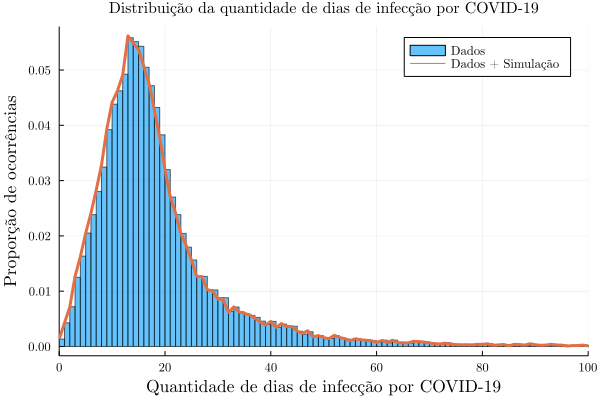

mean(QtdDiasRecuperadosCompletosValores) = 22.325360783126452
mean(QtdDiasRecuperadosTodosValores) = 22.311275568388616


In [38]:
QtdDiasRecuperadosTodos = Date.(df[(df[:,"evolucao"].===String15("RECUPERADO")),3],"m/d/y") .-
    Date.(df[df[:,"evolucao"].===String15("RECUPERADO"),1],"m/d/y")
QtdDiasRecuperadosTodosValores = [qd.value for qd in QtdDiasRecuperadosTodos]

dias = 0.:1.:maximum(QtdDiasRecuperadosTodosValores)
PorcentagemPorNumDias = [sum(QtdDiasRecuperadosTodosValores .== d) for d in dias]./length(QtdDiasRecuperadosTodosValores)

pl = histogram(QtdDiasRecuperadosCompletosValores,normalize=true,label="Dados",alpha=0.6,xlims=(0,100))
plot!(pl,dias,PorcentagemPorNumDias,label="Dados + Simulação",linewidth=3)
plot!(pl,title="Distribuição da quantidade de dias de infecção por COVID-19", titlefontsize=10,
    xlabel="Quantidade de dias de infecção por COVID-19",ylabel="Proporção de ocorrências", fontfamily = "Computer Modern")
display(pl)

savefig(pl, "infected.pdf")

@show mean(QtdDiasRecuperadosCompletosValores)
@show mean(QtdDiasRecuperadosTodosValores)

nothing

## 4; Modelagem dos dados de dias de infecção até óbito

- Modelando os dados de dias infecção por COVID-19 até óbito podemos completar os dados faltantes.

In [39]:
dfObitosDatasCompletas = df[(df[:,"evolucao"].===String15("OBITO")) .& (df[:,"dt_evolucao"].!==missing),:]

,dt_inicio_sintomas,evolucao,dt_evolucao
,String15,String15?,String15?
1,05/28/2020,OBITO,12/31/2020
2,12/14/2020,OBITO,12/31/2020
3,12/11/2020,OBITO,12/31/2020
4,11/20/2020,OBITO,12/31/2020
5,12/02/2020,OBITO,12/31/2020
6,12/28/2020,OBITO,12/31/2020
7,12/22/2020,OBITO,12/31/2020
8,12/22/2020,OBITO,12/31/2020
9,12/15/2020,OBITO,12/31/2020


In [40]:
Set(Date.(dfObitosDatasCompletas[:,3],"m/d/y"))

Set{Date} with 594 elements:
  Date("2021-10-13")
  Date("2020-05-13")
  Date("2020-05-10")
  Date("2020-07-21")
  Date("2020-07-07")
  Date("2021-09-15")
  Date("2021-05-26")
  Date("2020-03-22")
  Date("2020-09-11")
  Date("2020-12-10")
  Date("2021-09-12")
  Date("2021-03-24")
  Date("2021-10-15")
  Date("2021-05-13")
  Date("2020-07-31")
  Date("2021-04-10")
  Date("2021-01-10")
  Date("2020-07-12")
  Date("2021-08-20")
  Date("2021-07-05")
  Date("2021-06-28")
  Date("2020-04-21")
  Date("2020-04-19")
  Date("2021-11-03")
  Date("2021-04-21")
  ⋮ 

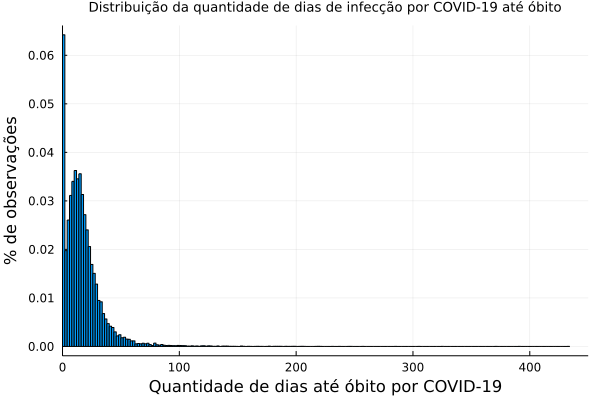

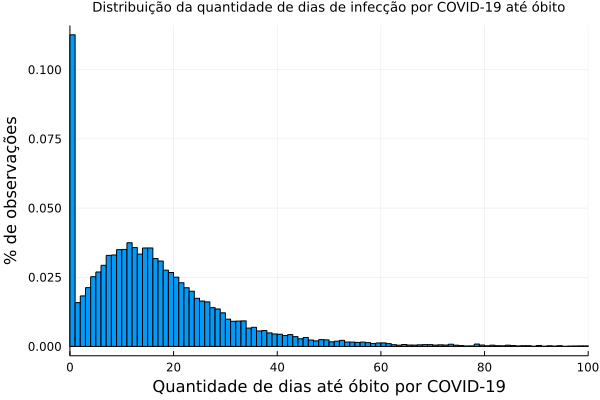

sum(QtdDiasObitosCompletosValores .== 0) = 3244
sum(QtdDiasObitosCompletosValores .== 0) / length(QtdDiasObitosCompletosValores) = 0.11261151803381123


In [41]:
QtdDiasObitosCompletos = Date.(dfObitosDatasCompletas[:,3],"m/d/y") .- Date.(dfObitosDatasCompletas[:,1],"m/d/y")
QtdDiasObitosCompletosValores = [qd.value for qd in QtdDiasObitosCompletos]

pl = histogram(QtdDiasObitosCompletosValores,bins=200,normalize=true,label="",xlims=(0,450))
plot!(pl, title="Distribuição da quantidade de dias de infecção por COVID-19 até óbito", titlefontsize=9,
    xlabel="Quantidade de dias até óbito por COVID-19",ylabel="% de observações")
display(pl)

pl = histogram(QtdDiasObitosCompletosValores,normalize=true,label="",xlims=(0,100))
plot!(pl,title="Distribuição da quantidade de dias de infecção por COVID-19 até óbito", titlefontsize=9,
    xlabel="Quantidade de dias até óbito por COVID-19",ylabel="% de observações")
display(pl)

@show sum(QtdDiasObitosCompletosValores.==0)
@show sum(QtdDiasObitosCompletosValores.==0)/length(QtdDiasObitosCompletosValores)

nothing

- É razoável assumir que o pico de indíviduos que vieram a óbito com $0$ dias de infecção representa algum tipo de anomalia no processo de registro dos dados. Por isso, **vamos descartá-los e simulá-los a partir dos demais**.

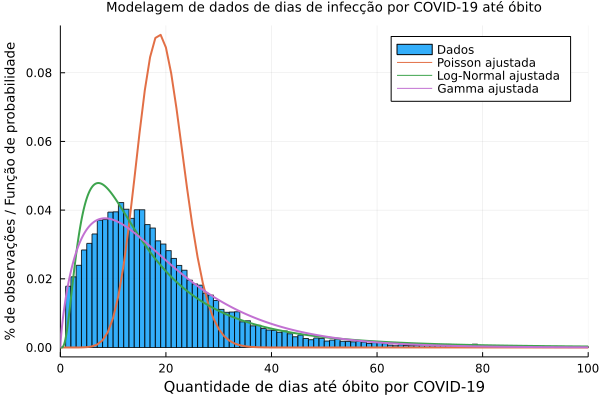

mean(QtdDiasObitosCompletosValores) = 19.19007941164965
mean(PoissonFit) = 19.19007941164965
mean(LogNormalFit) = 19.93432631125577
mean(GammaFit) = 19.29007941163973


In [42]:
QtdDiasObitosCompletosValoresKeep = QtdDiasObitosCompletosValores

QtdDiasObitosCompletos = QtdDiasObitosCompletos[QtdDiasObitosCompletos.!==Day(0)]
QtdDiasObitosCompletosValores = QtdDiasObitosCompletosValores[QtdDiasObitosCompletosValores.!==0]

dias = 0.:1.:100.
diass = 0.:0.05:100.

pl = histogram(QtdDiasObitosCompletosValores,normalize=true,alpha=0.8,label="Dados",xlims=(0,100))

PoissonFit = fit_mle(Poisson,QtdDiasObitosCompletosValores)
plot!(pl,dias,pdf.(PoissonFit,dias),linewidth=2,label="Poisson ajustada")

LogNormalFit = fit_mle(LogNormal,QtdDiasObitosCompletosValores.+0.1)
plot!(pl,diass,pdf.(LogNormalFit,diass),linewidth=2,label="Log-Normal ajustada")

GammaFit = fit_mle(Gamma,QtdDiasObitosCompletosValores.+0.1)
plot!(pl,diass,pdf.(GammaFit,diass),linewidth=2,label="Gamma ajustada")

plot!(pl,title="Modelagem de dados de dias de infecção por COVID-19 até óbito", titlefontsize=9,
    xlabel="Quantidade de dias até óbito por COVID-19",xlabelfontsize=10,
    ylabel="% de observações / Função de probabilidade",ylabelfontsize=9)

display(pl)

@show mean(QtdDiasObitosCompletosValores)
@show mean(PoissonFit)
@show mean(LogNormalFit)
@show mean(GammaFit)

nothing

Novamente, temos as três opções de antes para simular os dados faltantes:

- Utilizar a média ($19$ dias).


- Sortear os dados faltantes do vetor de dados completos.


- Utilizar alguma distribuição ajustada.

Utilizaremos mais uma vez a segunda opção.

In [43]:
IndicesObitosZeroDias =  (df[:,"evolucao"].===String15("OBITO")) .& (df[:,"dt_inicio_sintomas"] .=== df[:,"dt_evolucao"])
NumObitosZeroDias = sum(IndicesObitosZeroDias)
@show NumObitosZeroDias

df[IndicesObitosZeroDias,"dt_evolucao"] .= 
    Dates.format.(Date.(df[IndicesObitosZeroDias,"dt_inicio_sintomas"],"m/d/y") .+ rand(QtdDiasObitosCompletos,NumObitosZeroDias),"mm/dd/yyyy")

nothing

NumObitosZeroDias = 3244


In [44]:
IndicesMissingDatas = (df[:,"evolucao"].===String15("OBITO")) .& (df[:,"dt_evolucao"].===missing)
NumMissingDatas = sum(IndicesMissingDatas)
@show NumMissingDatas

df[IndicesMissingDatas,"dt_evolucao"] .= 
    Dates.format.(Date.(df[IndicesMissingDatas,"dt_inicio_sintomas"],"m/d/y") .+ rand(QtdDiasObitosCompletos,NumMissingDatas),"mm/dd/yyyy")

nothing

NumMissingDatas = 13


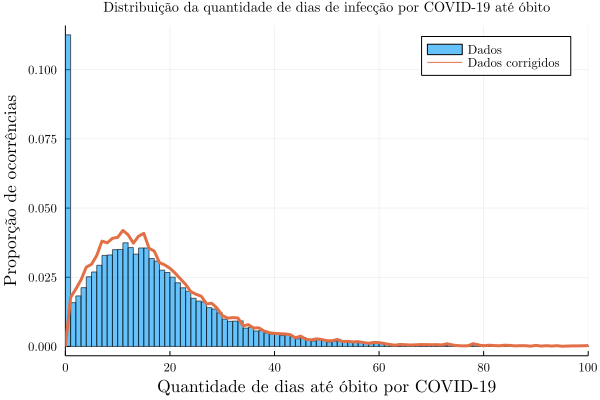

mean(QtdDiasObitosCompletosValores) = 19.19007941164965
mean(QtdDiasObitosTodosValores) = 19.191950034698127


In [47]:
QtdDiasObitosTodos = Date.(df[(df[:,"evolucao"].===String15("OBITO")),3],"m/d/y") .-
    Date.(df[df[:,"evolucao"].===String15("OBITO"),1],"m/d/y")
QtdDiasObitosTodosValores = [qd.value for qd in QtdDiasObitosTodos]

dias = 0.:1.:maximum(QtdDiasObitosTodosValores)
PorcentagemPorNumDias = [sum(QtdDiasObitosTodosValores .== d) for d in dias]./length(QtdDiasObitosTodosValores)

pl = histogram(QtdDiasObitosCompletosValoresKeep,normalize=true,label="Dados",alpha=0.6,xlims=(0,100))
plot!(pl,dias,PorcentagemPorNumDias,label="Dados corrigidos",linewidth=3)
plot!(pl,title="Distribuição da quantidade de dias de infecção por COVID-19 até óbito", titlefontsize=9,
    xlabel="Quantidade de dias até óbito por COVID-19",ylabel="Proporção de ocorrências", fontfamily = "Computer Modern")
display(pl)

savefig(pl, "deceased.pdf")

@show mean(QtdDiasObitosCompletosValores)
@show mean(QtdDiasObitosTodosValores)

nothing

In [46]:
NumeroTotalCasos = length(QtdDiasObitosTodosValores)+length(QtdDiasRecuperadosTodosValores)
ProporcaoMortes = length(QtdDiasObitosTodosValores)/NumeroTotalCasos
TempoMedioInfeccao = mean(vcat(QtdDiasObitosTodosValores,QtdDiasRecuperadosTodosValores))

@show ProporcaoMortes
@show TempoMedioInfeccao

nothing

ProporcaoMortes = 0.06535888422723665
TempoMedioInfeccao = 22.107399931965077


## 5; Construção das curvas de infectados, recuperados e óbitos 

In [46]:
df[(df[:,"evolucao"].===String15("ATIVO")),"dt_evolucao"] .= Dates.format(DataFinal,"mm/dd/yyyy")

sum(Date.(df[:,"dt_evolucao"],"m/d/y") .> DataFinal)

4229

In [47]:
sum((Date.(df[:,"dt_evolucao"],"m/d/y") .> DataFinal) .& (df[:,"evolucao"] .=== String15("RECUPERADO")))

4208

In [48]:
sum((Date.(df[:,"dt_evolucao"],"m/d/y") .> DataFinal) .& (df[:,"evolucao"] .=== String15("OBITO")))

21

In [49]:
sum((Date.(df[:,"dt_evolucao"],"m/d/y")) .< (Date.(df[:,"dt_inicio_sintomas"],"m/d/y")))

0

In [50]:
Infectados  = fill(0, NumDiasInicioAoFimValor)
Recuperados = fill(0, NumDiasInicioAoFimValor)
Obitos      = fill(0, NumDiasInicioAoFimValor)

for row in eachrow(df)
    IndiceInicioSintomas = (Date(row["dt_inicio_sintomas"],"m/d/y") - DataInicial + Day(1)).value # Sempre >= 1 
    IndiceEvolucao = (Date(row["dt_evolucao"],"m/d/y") - DataInicial + Day(1)).value # Pode ser > NumDiasInicioAoFimValor!
    
    if row["evolucao"] == "ATIVO"
        Infectados[IndiceInicioSintomas:end] .+= 1
    elseif row["evolucao"] == "RECUPERADO"
        Infectados[IndiceInicioSintomas:min(IndiceEvolucao,NumDiasInicioAoFimValor+1)-1] .+= 1
        Recuperados[min(IndiceEvolucao,NumDiasInicioAoFimValor+1):end] .+= 1
    elseif row["evolucao"] == "OBITO"
        Infectados[IndiceInicioSintomas:min(IndiceEvolucao,NumDiasInicioAoFimValor+1)-1] .+= 1
        Obitos[min(IndiceEvolucao,NumDiasInicioAoFimValor+1):end] .+= 1
    end
end

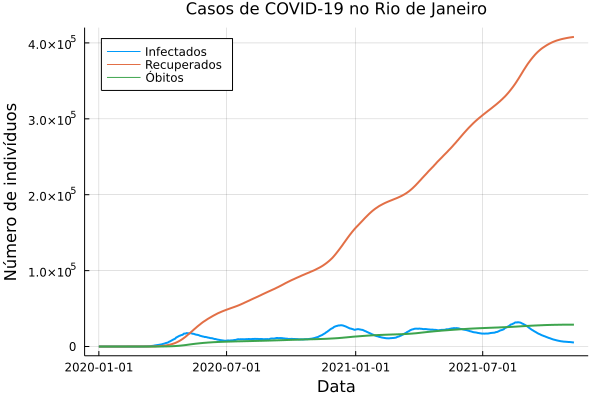

In [51]:
plot(Datas, hcat(Infectados, Recuperados, Obitos), label=["Infectados" "Recuperados" "Óbitos"], linewidth=2)
plot!(title="Casos de COVID-19 no Rio de Janeiro", titlefont=11, gridalpha=0.22,
    xlabel="Data", ylabel="Número de indivíduos", legend=:topleft)

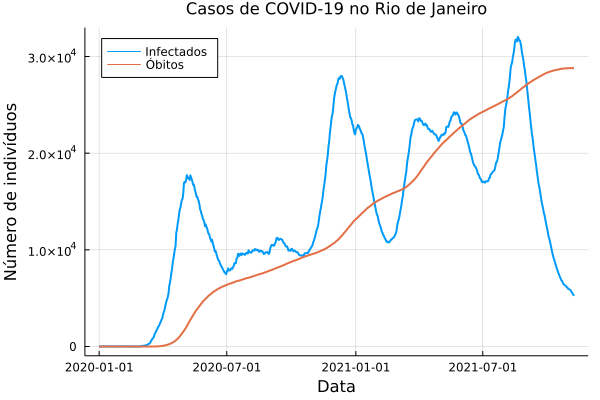

In [52]:
plot(Datas, hcat(Infectados, Obitos), label=["Infectados" "Óbitos"], linewidth=2)
plot!(title="Casos de COVID-19 no Rio de Janeiro", titlefont=11, gridalpha=0.22,
    xlabel="Data", ylabel="Número de indivíduos", legend=:topleft)

### 5.1; Médias móveis

In [53]:
NumDiasMedia = 7
DatasMedia = DataInicial .+ Day.(NumDiasMedia-1:NumDiasInicioAoFimValor-1)
InfectadosMedia = sum([Infectados[k:end-NumDiasMedia+k] for k=1:NumDiasMedia])/NumDiasMedia
RecuperadosMedia = sum([Recuperados[k:end-NumDiasMedia+k] for k=1:NumDiasMedia])/NumDiasMedia
ObitosMedia = sum([Obitos[k:end-NumDiasMedia+k] for k=1:NumDiasMedia])/NumDiasMedia
nothing

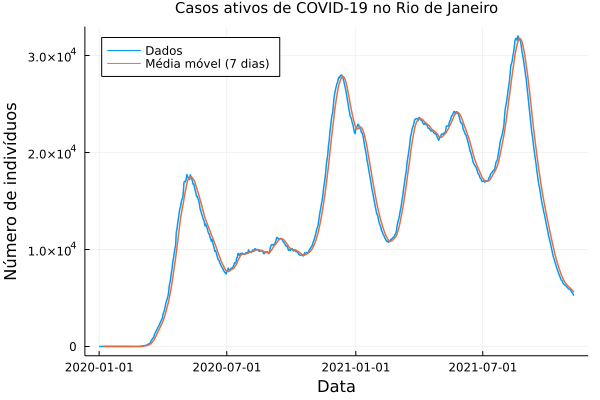

In [54]:
plot(Datas, Infectados, label="Dados", linewidth=1.5)
plot!(DatasMedia, InfectadosMedia, label="Média móvel ($NumDiasMedia dias)", linewidth=1.5)
plot!(title="Casos ativos de COVID-19 no Rio de Janeiro", titlefont=10, legend=:topleft,
    xlabel="Data", ylabel="Número de indivíduos")

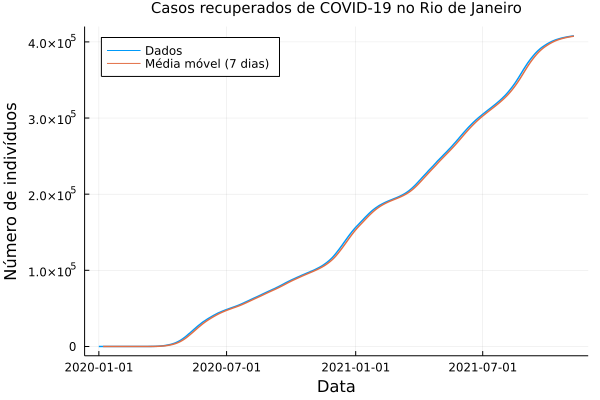

In [55]:
plot(Datas, Recuperados, label="Dados", linewidth=1.5)
plot!(DatasMedia, RecuperadosMedia, label="Média móvel ($NumDiasMedia dias)", linewidth=1.5)
plot!(title="Casos recuperados de COVID-19 no Rio de Janeiro", titlefont=10, legend=:topleft,
    xlabel="Data", ylabel="Número de indivíduos")

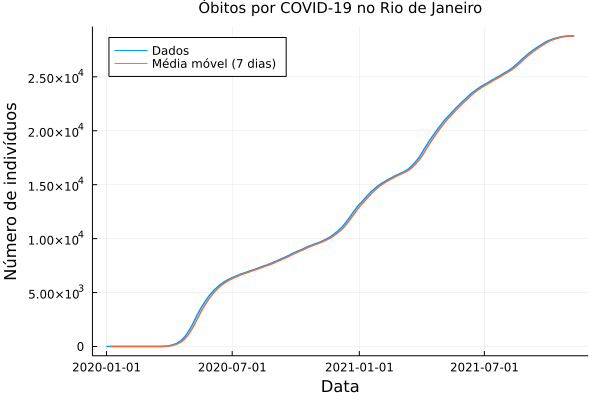

In [56]:
plot(Datas, Obitos, label="Dados", linewidth=1.5)
plot!(DatasMedia, ObitosMedia, label="Média móvel ($NumDiasMedia dias)", linewidth=1.5)
plot!(title="Óbitos por COVID-19 no Rio de Janeiro", titlefont=10, legend=:topleft,
    xlabel="Data", ylabel="Número de indivíduos")

### 5.2; Gravando em disco

In [57]:
dfDadosDiarios = DataFrame(:Datas => Datas, :Infectados => Infectados, :Recuperados => Recuperados, :Obitos => Obitos)

,Datas,Infectados,Recuperados,Obitos
,Date,Int64,Int64,Int64
1,2020-01-01,4,0,0
2,2020-01-02,5,0,0
3,2020-01-03,5,0,0
4,2020-01-04,5,0,0
5,2020-01-05,6,0,0
6,2020-01-06,8,0,0
7,2020-01-07,9,0,0
8,2020-01-08,9,1,0
9,2020-01-09,9,1,0


In [58]:
CSV.write("DadosDiarios.csv", dfDadosDiarios)

"DadosDiarios.csv"

In [59]:
dfDadosMedia = DataFrame(:DatasMedia => DatasMedia, :InfectadosMedia => InfectadosMedia, :RecuperadosMedia => RecuperadosMedia, :ObitosMedia => ObitosMedia)

,DatasMedia,InfectadosMedia,RecuperadosMedia,ObitosMedia
,Date,Float64,Float64,Float64
1,2020-01-07,6.0,0.0,0.0
2,2020-01-08,6.71429,0.142857,0.0
3,2020-01-09,7.28571,0.285714,0.0
4,2020-01-10,7.85714,0.428571,0.0
5,2020-01-11,8.42857,0.571429,0.0
6,2020-01-12,8.71429,0.857143,0.0
7,2020-01-13,8.71429,1.14286,0.0
8,2020-01-14,8.42857,1.57143,0.0
9,2020-01-15,8.28571,1.85714,0.0


In [60]:
CSV.write("DadosMedia.csv", dfDadosMedia)

"DadosMedia.csv"

## 6; Gráficos para o relatório

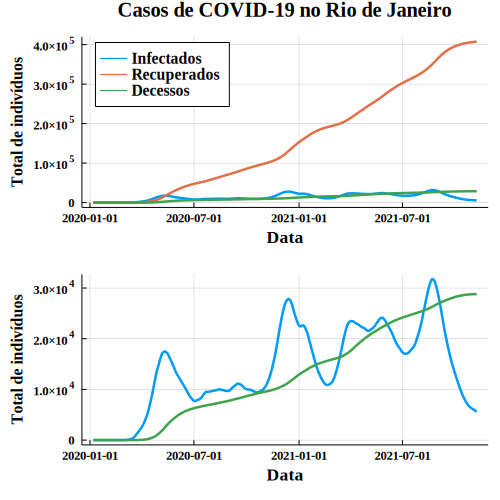

In [68]:
ff = "Times Bold"

p1 = plot(DatasMedia, hcat(InfectadosMedia, RecuperadosMedia, ObitosMedia), label = ["Infectados" "Recuperados" "Decessos"],
    lw = 2.5)
plot!(p1, fontfamily = ff, gridalpha = 0.22, xlabel = "Data", ylabel = "Total de indivíduos",
    legend = :topleft, legendfontsize = 10, ylabelfontsize = 10)

p2 = plot(DatasMedia, InfectadosMedia, label = "Infectados", color = 1, lw = 2.5)
plot!(p2, DatasMedia, ObitosMedia, label = "Decessos", color = 3, lw = 2.5)
plot!(p2, fontfamily = ff, gridalpha = 0.22, xlabel = "Data", ylabel = "Total de indivíduos",
    legend = false, ylabelfontsize = 10)

fig1 = plot(p1, p2, layout = (2, 1), plot_title = "Casos de COVID-19 no Rio de Janeiro",
    plot_titlefontsize = 13, size = (500, 500))
display(fig1)
savefig(fig1, "covid_cases.pdf")

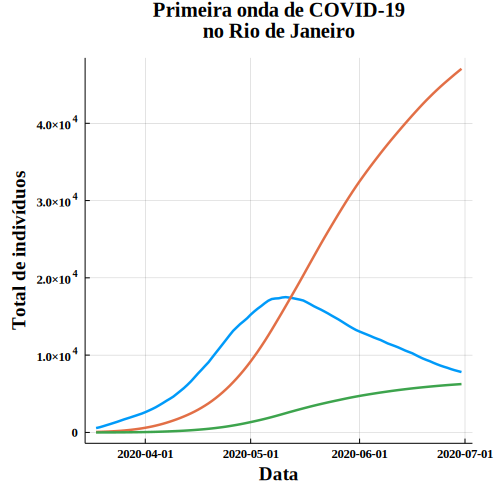

In [69]:
L = findall(data -> data == Date(2020, 03, 18), DatasMedia)[1]
R = findall(data -> data == Date(2020, 06, 30), DatasMedia)[1]

fig2 = plot(DatasMedia[L:R], hcat(InfectadosMedia[L:R], RecuperadosMedia[L:R], ObitosMedia[L:R]), label =
    ["Infectados" "Recuperados" "Decessos"], lw = 2.5)
plot!(fig2, fontfamily = ff, gridalpha = 0.22, xlabel = "Data", ylabel = "Total de indivíduos",
    legend = :topleft, legendfontsize = 11, ylabelfontsize = 12, xlabelfontsize = 12, title =
    "Primeira onda de COVID-19 \nno Rio de Janeiro",  titlefontsize = 13)

using Plots.PlotMeasures
plot!(fig2, size = (500, 500), right_margin = 5mm, legend = false)

display(fig2)
savefig(fig2, "covid_wave.pdf")